In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [24]:
# creating the data set

X,y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

# Normalisation
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

X = (X-u)/std

In [25]:
# add a column of ones for vectorisation

ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [26]:

""" def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e= 0.0
    m= X.shape[0]
    y_= hypothesis(X,theta)
    
    e = np.sum((y-y_)**2)
    
    return e/m

def gradient(X,y,theta):
          
    y_= hypothesis(X,theta)
    
    grad = np.dot(X.T,(y_ - y))
    
    m = X.shape[0]
    
    return grad/m
    

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent --> batch gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list
""" 

' def hypothesis(X,theta):\n    return np.dot(X,theta)\n\ndef error(X,y,theta):\n    e= 0.0\n    m= X.shape[0]\n    y_= hypothesis(X,theta)\n    \n    e = np.sum((y-y_)**2)\n    \n    return e/m\n\ndef gradient(X,y,theta):\n          \n    y_= hypothesis(X,theta)\n    \n    grad = np.dot(X.T,(y_ - y))\n    \n    m = X.shape[0]\n    \n    return grad/m\n    \n\ndef gradient_descent(X,y,learning_rate=0.1,max_epochs=300):\n    \n    n = X.shape[1]\n    theta = np.zeros((n,))\n    error_list = []\n    \n    for i in range(max_epochs):\n        e = error(X,y,theta)\n        error_list.append(e)\n        \n        # Gradient Descent --> batch gradient descent\n        grad = gradient(X,y,theta)\n        theta = theta - learning_rate*grad\n        \n    return theta,error_list\n'

In [27]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e= 0.0
    m= X.shape[0]
    y_= hypothesis(X,theta)
    
    e = np.sum((y-y_)**2)
    
    return e/m

def gradient(X,y,theta):
          
    y_= hypothesis(X,theta)
    
    grad = np.dot(X.T,(y_ - y))
    
    m = X.shape[0]
    
    return grad/m

def batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_epochs=100):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Mini batch Gradient Descent
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches = m//batch_size         #if batch size=1 it becomes stochastic gd
        
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size, : ]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = learning_rate*batch_gradient
            
    return theta,error_list
    

In [28]:
theta,error_list = batch_gradient_descent(X,y)

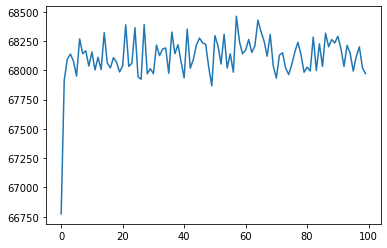

In [29]:
plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()